<h1><font="5">INTRODUCTION</font></h1>
<P>Sentiment Analyzers are a part of Natural Language Processing (NLP). NLP, simply put, is a machine learning technology that allows computers to understand human language. Chances are, you're already familiar with this technology or have even used it yourself! Smart assistants like Siri and Alexa, chatbots like ChatGPT and Gemini, and tools like Grammarly all leverage NLP.

Sentiment Analysis, also referred to as opinion mining, is a specific application within NLP focused on analyzing the emotional tone of text. It aims to classify text as positive, negative, or neutral. For instance, classifying YouTube comments under a video helps creators understand what type of content resonates with their viewers. Similarly, analyzing product reviews helps companies gauge how well their products are performing in the market. As you can see, sentiment analysis holds significant importance. Now that you have a basic understanding of this field, let's waste no more time and dive into the project itself!</P>

In [1]:
# import all the necessary libraries
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/spotify-dataset/DATASET.csv")
df.head(10) # view the first 10 rows of the dataframe

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
5,The player controls sometimes disappear for no...,NEGATIVE
6,I love the selection and the lyrics are provid...,POSITIVE
7,Still extremely slow when changing storage to ...,NEGATIVE
8,It's a great app and the best mp3 music app I ...,POSITIVE
9,"I'm deleting this app, for the following reaso...",NEGATIVE


<h1><font size="5">BASIC EDA</font></h1>

EDA (Exploratory Data Analysis) is an approach used in data science and statistics to analyze and summarize the main characteristics of a dataset, i.e. to gain a well-rounded overview of a dataset.

In [3]:
df.info() #provides a summary of the data frame

#understanding the output of this code:
#Total entries we have : 52,702
#2 columns- "Review" and "label"
#Review column has 52,686 non-null entries i.e. 16 null entries(52,702-52,686=16)
#hence we have 16 missing values that need to be handled.
#label column has all non-null entries hence no missing values.
#Dtype is object which means data is of text/mixed type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [4]:
df.isnull().sum() # Explicitly check for missing values

Review    16
label      0
dtype: int64

In [5]:
#as the missing values compromise of a small section of our dataset
#The best approach is to just drop them.
df = df.dropna(subset=['Review']) 

In [6]:
df.info()  # the dataset is now free of missing values!

<class 'pandas.core.frame.DataFrame'>
Index: 52686 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52686 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
df['label'].value_counts()# Check sentiment/label distribution

label
NEGATIVE    29423
POSITIVE    23263
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

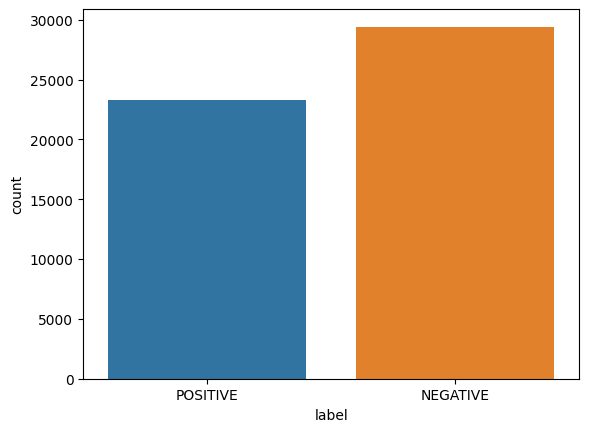

In [8]:
sns.countplot(x='label', data=df)  # Visualize the sentiment/label distribution


<h1>TEXT PREPROCESSING¶</h1>
<p>Text preprocessing is a crucial step in natural language processing (NLP) and machine learning tasks. It involves transforming raw text into a clean, structured format that can be more easily and effectively be analyzed by models.

Data (Text) preprocessing will have the following steps:
</p>
<h4><b>1. Cleaning</b></h4>
<h4><b>2. Tokenization</b></h4>
<h4><b>3. Stop words removal</b></h4>
<h4><b>4. Stemming or Lemmatization</b></h4>


<h1>1. CLEANING THE DATASET¶</h1>
<p>The "Reviews" column of our dataset has a variety of symbols, punctuation, special character etc in it that is not of our requirement. Example: , : ( ) ? . " ; ! - + = ~ % etc are not of use.</p>

In [9]:
import re

def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()  # Convert all to lowercase

In [10]:
df['Review'] = df['Review'].apply(clean_text) #applying the clean_text function to Review column

In [11]:
#VIEW THE CLEANED TEXTS IN "Review" column again
pd.set_option('display.max_colwidth', None) #to view text fully and so that
#pandas doesn't truncate the text

print(df.iloc[283]['Review']) #view entry 283 

i really like a sound hello everyone have a nice day stay safe always god bless


<h1>2. TOKENIZATION</h1>
<p>Tokenization is the process of breaking down a string of text into smaller units, or tokens, which essentially are meaningful words.

We require an individual meaniningful entity to work upon which can only be words and not sentences.

Example: good, great, wow etc signal a positive review.

bad, lame, boring etc signal a negative review.</p>

In [12]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
df["tokens"] = df["Review"].apply(tokenize_text)
print(df.iloc[283]["tokens"])

['i', 'really', 'like', 'a', 'sound', 'hello', 'everyone', 'have', 'a', 'nice', 'day', 'stay', 'safe', 'always', 'god', 'bless']


<h1>3. REMOVING STOPWORDS¶</h1>
<p>Stop words are words that have less meaningful value/contribution to our analysis. Words like i, he, she, they, went, want, for, in etc hold little to no value and hence are better off removed.

You can also create a list of custom stop words specific to your domain. For example words like music, app, playlist etc are common stop words for this dataset.</p>


In [13]:
df["tokens"]

0                                                                                                                                                                                                                                             [great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]
1                                                                                                                                                                                                                                                                             [please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]
2                                                                                                                                                                                                                                                        [this, pop,

In [14]:
from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english")) # Get the set of English stopwords
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    return [word for word in tokens if word.lower() not in stop_words] # Filter out stopwords

In [15]:
custom_stopwords = {'app', 'music','play', 'spotify', 'song', 'songs', 'listen', 'playing','get', 'playlist'}

df["filtered_tokens"] = df["tokens"].apply(remove_stopwords)

In [16]:
df.head()

,Review,label,tokens,filtered_tokens
0,great music service the audio is high quality and the app is easy to use also very quick and friendly support,POSITIVE,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]"
1,please ignore previous negative rating this app is super great i give it five stars,POSITIVE,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]","[please, ignore, previous, negative, rating, super, great, give, five, stars]"
2,this pop up get the best spotify experience on android is too annoying please let s get rid of this,NEGATIVE,"[this, pop, up, get, the, best, spotify, experience, on, android, is, too, annoying, please, let, s, get, rid, of, this]","[pop, best, experience, android, annoying, please, let, rid]"
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of, recently]","[really, buggy, terrible, use, recently]"
4,dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]","[dear, put, shuffle]"


<h1>5. LEMMATIZATION</h1>
<p>Lemmatization reduces words to their base or dictionary form (lemma) by considering their dictionary meaning hence providing more accuracy than stemming.

For example:

"running" becomes "run,"

"better" becomes "good."

"ring" remains "ring."</p>

In [17]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
#to use wordnet; execute this (to avoid error).

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

In [19]:
df["lemmatized_tokens"] = df["filtered_tokens"].apply(lemmatize_tokens)

In [20]:
df.head()

,Review,label,tokens,filtered_tokens,lemmatized_tokens
0,great music service the audio is high quality and the app is easy to use also very quick and friendly support,POSITIVE,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]"
1,please ignore previous negative rating this app is super great i give it five stars,POSITIVE,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]","[please, ignore, previous, negative, rating, super, great, give, five, stars]","[please, ignore, previous, negative, rat, super, great, give, five, star]"
2,this pop up get the best spotify experience on android is too annoying please let s get rid of this,NEGATIVE,"[this, pop, up, get, the, best, spotify, experience, on, android, is, too, annoying, please, let, s, get, rid, of, this]","[pop, best, experience, android, annoying, please, let, rid]","[pop, best, experience, android, annoy, please, let, rid]"
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of, recently]","[really, buggy, terrible, use, recently]","[really, buggy, terrible, use, recently]"
4,dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]","[dear, put, shuffle]","[dear, put, shuffle]"


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

def apply_tfidf(df):
    df["tfidf_tokens"] = df["lemmatized_tokens"].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df["tfidf_tokens"])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix,feature_names,tfidf_vectorizer

tfidf_matrix, feature_names,tfidf_vectorizer = apply_tfidf(df)

<h1>SPLITTING DATASET</h1>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x = tfidf_matrix
# y = df["label"]

encoder = LabelEncoder()
y = encoder.fit_transform(df['label']) 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8783


In [25]:
def predict_sentiment(review_text,tfidf_vectorizer,model):
    review_tfidf = tfidf_vectorizer.transform([review_text])
    prediction = model.predict(review_tfidf)
    decoded_prediction = encoder.inverse_transform([prediction[0]])  # Decode label

    return decoded_prediction[0]

new_review = "very good"
predicted_sentiment = predict_sentiment(new_review,tfidf_vectorizer,model)
print(f"Predicted Sentiment for the review: {predicted_sentiment}")

Predicted Sentiment for the review: POSITIVE
